In [11]:
import pandas as pd
import numpy as np
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns


# Фиксируем "случайность" для воспроизводимости
np.random.seed(42)

In [2]:
path = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")

# Проверим, что внутри
for file in os.listdir(path):
  print(file)



100%|██████████| 84.7M/84.7M [00:00<00:00, 163MB/s]

Extracting files...


GlobalLandTemperaturesByMajorCity.csv
GlobalLandTemperaturesByState.csv
GlobalTemperatures.csv
GlobalLandTemperaturesByCity.csv
GlobalLandTemperaturesByCountry.csv


Глобальные температуры суши, океана и суши ( GlobalTemperatures.csv ):

Дата: начинается в 1750 году для средней температуры суши и в 1850 году для максимальной и минимальной температуры суши, а также глобальной температуры океана и суши.

LandAverageTemperature: средняя глобальная температура суши в градусах Цельсия

LandAverageTemperatureUncertainty: 95% доверительный интервал вокруг среднего значения

LandMaxTemperature: глобальная средняя максимальная температура суши в градусах Цельсия

LandMaxTemperatureUncertainty: 95% доверительный интервал вокруг максимальной температуры земли

LandMinTemperature: глобальная средняя минимальная температура суши в градусах Цельсия

LandMinTemperatureUncertainty: 95% доверительный интервал вокруг минимальной температуры земли

LandAndOceanAverageTemperature: глобальная средняя температура суши и океана в градусах Цельсия

LandAndOceanAverageTemperatureUncertainty: 95% доверительный интервал вокруг средней глобальной температуры суши и океана.

Глобальные температуры суши по крупным городам ( GlobalLandTemperaturesByMajorCity.csv )

In [7]:
# Загружаем данные
df = pd.read_csv(path+"/GlobalLandTemperaturesByMajorCity.csv")

In [8]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [10]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


<Axes: xlabel='AverageTemperatureUncertainty'>

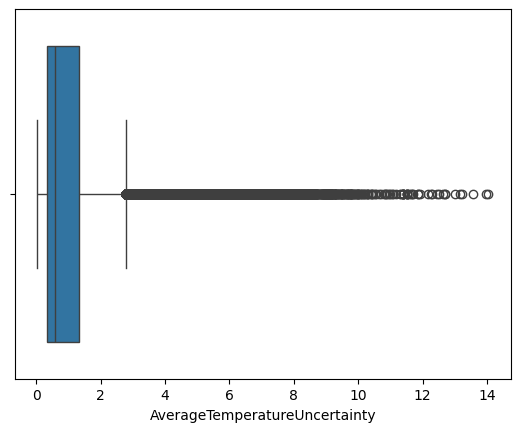

In [12]:
sns.boxplot(data = df, x = 'AverageTemperatureUncertainty')

есть подозрения на выбросы в столбце AverageTemperatureUncertainty

In [13]:
df.isnull().sum()

,0
dt,0
AverageTemperature,11002
AverageTemperatureUncertainty,11002
City,0
Country,0
Latitude,0
Longitude,0


In [14]:
df.isnull().head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [15]:
df[df.isnull().any(axis=1)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
36,1852-01-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
37,1852-02-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
38,1852-03-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
39,1852-04-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
40,1852-05-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
237089,1839-10-01,NaN,NaN,Xian,China,34.56N,108.97E
237090,1839-11-01,NaN,NaN,Xian,China,34.56N,108.97E
237091,1839-12-01,NaN,NaN,Xian,China,34.56N,108.97E
237422,1867-07-01,NaN,NaN,Xian,China,34.56N,108.97E


выбрали стратегию - удалить пропуски

In [16]:
df = df.dropna()
df.isnull().sum()

,0
dt,0
AverageTemperature,0
AverageTemperatureUncertainty,0
City,0
Country,0
Latitude,0
Longitude,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228175 entries, 0 to 239175
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             228175 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           228175 non-null  object 
 4   Country                        228175 non-null  object 
 5   Latitude                       228175 non-null  object 
 6   Longitude                      228175 non-null  object 
dtypes: float64(2), object(5)
memory usage: 13.9+ MB


In [18]:
df.dt = pd.to_datetime(df.dt)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228175 entries, 0 to 239175
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             228175 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           228175 non-null  object        
 4   Country                        228175 non-null  object        
 5   Latitude                       228175 non-null  object        
 6   Longitude                      228175 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 13.9+ MB


In [19]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


сколько стран и сколько городов?

In [23]:
print("всего стран в датасете",df['Country'].nunique())
print("всего городов в датасете",df['City'].nunique())

всего стран в датасете 49
всего городов в датасете 100


выбрали Москву для исследования

In [29]:
city = "Moscow"
df_msk = df.query(f"City == '{city}'").reset_index()
df_msk.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,155196,1743-11-01,-2.570,2.037,Moscow,Russia,55.45N,36.85E
1,155201,1744-04-01,6.555,2.544,Moscow,Russia,55.45N,36.85E
2,155202,1744-05-01,10.063,1.875,Moscow,Russia,55.45N,36.85E
3,155203,1744-06-01,15.393,1.732,Moscow,Russia,55.45N,36.85E
4,155204,1744-07-01,17.584,1.543,Moscow,Russia,55.45N,36.85E


In [30]:
df_msk = df_msk.sort_values('dt')
df_msk.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,155196,1743-11-01,-2.570,2.037,Moscow,Russia,55.45N,36.85E
1,155201,1744-04-01,6.555,2.544,Moscow,Russia,55.45N,36.85E
2,155202,1744-05-01,10.063,1.875,Moscow,Russia,55.45N,36.85E
3,155203,1744-06-01,15.393,1.732,Moscow,Russia,55.45N,36.85E
4,155204,1744-07-01,17.584,1.543,Moscow,Russia,55.45N,36.85E


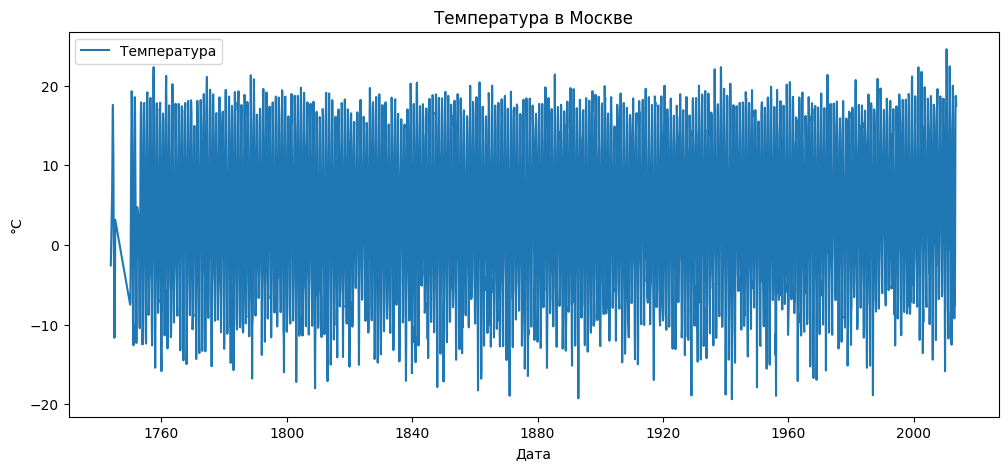

In [31]:
plt.figure(figsize=(12,5))
plt.plot(df_msk.dt, df_msk["AverageTemperature"], label="Температура")
plt.title("Температура в Москве")
plt.xlabel("Дата")
plt.ylabel("°C")
plt.legend()
plt.show()


возьмем последние 100 лет

In [33]:
df_short = df_msk[df_msk.dt >= '1925-09-01']

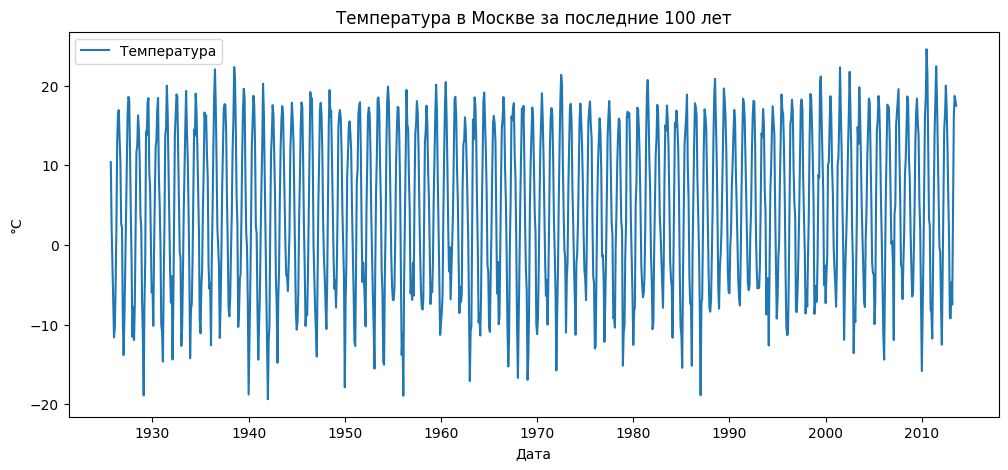

In [34]:
plt.figure(figsize=(12,5))
plt.plot(df_short.dt, df_short["AverageTemperature"], label="Температура")
plt.title("Температура в Москве за последние 100 лет")
plt.xlabel("Дата")
plt.ylabel("°C")
plt.legend()
plt.show()


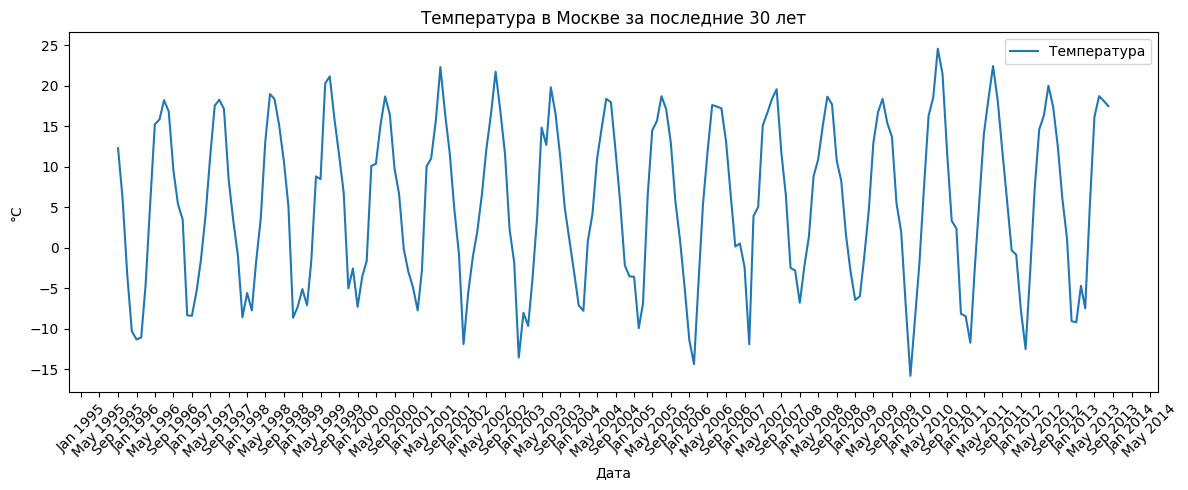

In [39]:


import matplotlib.dates as mdates

df_short = df_short[df_short.dt >= '1995-09-01']
plt.figure(figsize=(12,5))
plt.plot(df_short.dt, df_short["AverageTemperature"], label="Температура")
plt.title("Температура в Москве за последние 30 лет")
plt.xlabel("Дата")
plt.ylabel("°C")
plt.legend()

# Добавляем месячные тики
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))   # каждый месяц
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # формат: "Sep 1995"

plt.xticks(rotation=45)  # чтобы не налезали друг на друга
plt.tight_layout()
plt.show()

сезонность увидели, летом и зимой разные температуры

тренд очень трудно выделить визуально

шум имеется в виде неравномерных пиков

In [36]:
df_short.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
2950,158218,1995-09-01,12.285,0.262,Moscow,Russia,55.45N,36.85E
2951,158219,1995-10-01,6.058,0.248,Moscow,Russia,55.45N,36.85E
2952,158220,1995-11-01,-3.397,0.207,Moscow,Russia,55.45N,36.85E
2953,158221,1995-12-01,-10.322,0.119,Moscow,Russia,55.45N,36.85E
2954,158222,1996-01-01,-11.346,0.369,Moscow,Russia,55.45N,36.85E


исследуем ACF и PACF

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf  # добавили pacf

In [44]:
df_short = df_short.set_index("dt")

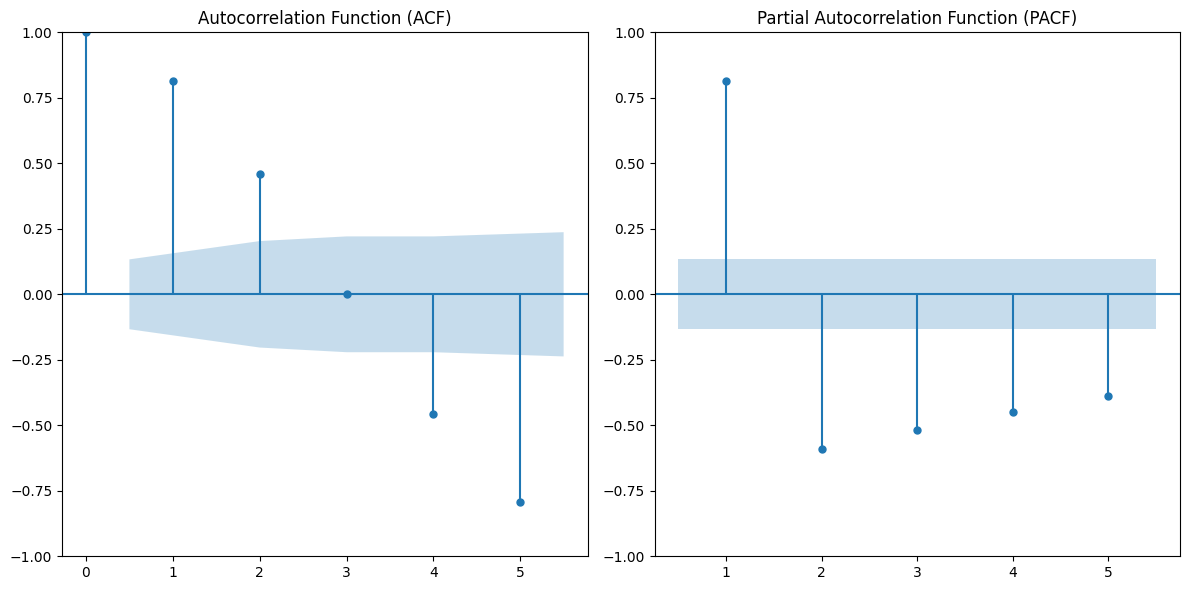

ACF значения (лаги 0-5):
[ 1.          0.81303655  0.46112634  0.00177193 -0.45514656 -0.79295229]

PACF значения (лаги 0-5):
[ 1.          0.81681812 -0.60622285 -0.54003783 -0.48290857 -0.4535495 ]


In [45]:
# === ACF (Автокорреляция) ===
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(df_short['AverageTemperature'], lags=5, ax=plt.gca(), title='Autocorrelation Function (ACF)')
# ax=plt.gca() — используется, чтобы plot_acf рисовал в текущей оси
# === PACF (Частичная автокорреляция) ===
plt.subplot(1, 2, 2)
plot_pacf(df_short['AverageTemperature'], lags=5, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)', zero=False)
# zero=False — не показывать лаг 0 (опционально, но часто так делают)
plt.tight_layout()
plt.show()
# === Вычисление значений ACF и PACF ===
acf_values = acf(df_short['AverageTemperature'], nlags=5)
pacf_values = pacf(df_short['AverageTemperature'], nlags=5)
print("ACF значения (лаги 0-5):")
print(acf_values)
print("\nPACF значения (лаги 0-5):")
print(pacf_values)


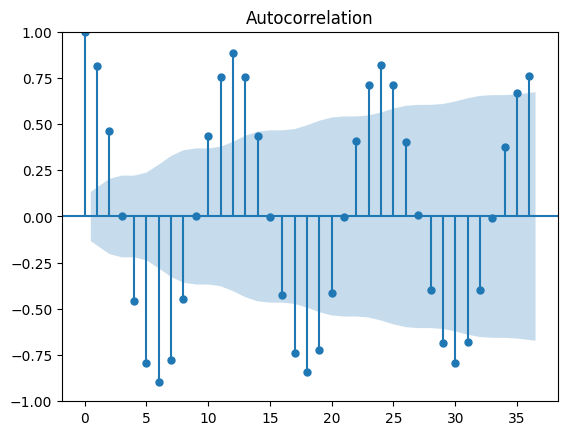

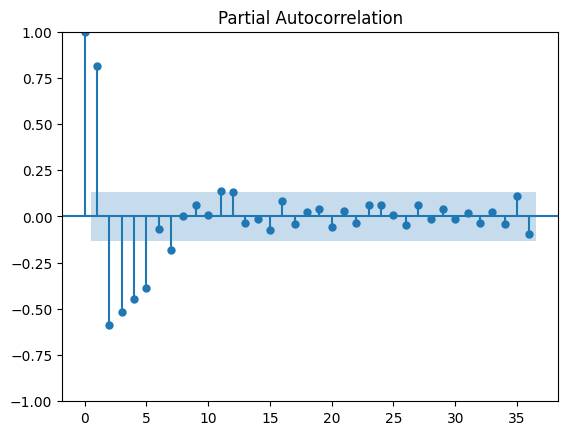

In [46]:
plot_acf(df_short["AverageTemperature"], lags=36)
plt.show()

plot_pacf(df_short["AverageTemperature"], lags=36)
plt.show()


Видно, что есть пики на лагах 12,24,36 - это доказывает годовую сезонность